Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Mohamed Abdelaziz | 12137202 | 24.01.2022, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 6 (Assignment)  &ndash; Convolutional neural networks </h2>

<b>Authors:</b> Brandstetter, Schäfl, Schlüter, Rumetshofer, Schörgenhumer<br>
<b>Date:</b> 10-01-2022

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

In [1]:
# Required packages and the u5_utils file
import u6_utils as u6
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import torch

u6.check_module_versions()
# Set plotting style of seaborn related plots.
sns.set()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.21.1 (✓)
Installed pandas version: 1.3.1 (✓)
Installed scikit-learn version: 1.0 (✓)
Installed matplotlib version: 3.4.3 (✓)
Installed seaborn version: 0.11.2 (✓)
Installed torch version: 1.10.0+cpu (✓)
Installed tqdm version: 4.62.1 (✓)
Installed cv2 version: 4.5.4 (✓)


# Exercise 1

Similar to the Sobel filter presented in the lecture, apply two other operators (<i>Prewitt</i> and <i>Scharr</i>) to an image for the horizontal and the vertical approximations of the derivatives of the image intensity function. Perfom the following tasks:

- Load a picture of Charlie (<code>charlie_1.jpg</code>) and convert it to grayscale. Also plot the grayscale image to see what it looks like.
- Define the two Prewitt operators as numpy arrays:

\begin{equation}P_x = \left[
    \begin{array}{rrr}                                
        1 & 0 & -1 \\
        1 & 0 & -1 \\
        1 & 0 & -1 \\
    \end{array}\right]
\end{equation}

\begin{equation}P_y = \left[
    \begin{array}{rrr}                                
        1 & 1 & 1 \\
        0 & 0 & 0 \\
        -1 & -1 & -1 \\
    \end{array}\right]
\end{equation}

- Apply the two Prewitt operators to the grayscale version of Charlie and plot the result.
- Define the two Scharr operators as numpy arrays:

\begin{equation}S_x = \left[
    \begin{array}{rrr}                                
        47 & 0 & -47 \\
        162 & 0 & -162 \\
        47 & 0 & -47 \\
    \end{array}\right]
\end{equation}

\begin{equation}S_y = \left[
    \begin{array}{rrr}                                
        47 & 162 & 47 \\
        0 & 0 & 0 \\
        -47 & -162 & -47 \\
    \end{array}\right]
\end{equation}

- Apply the two operators to the grayscale version of Charlie and plot the result.

**1.1. Load the image, convert it to grayscale and plot it.**

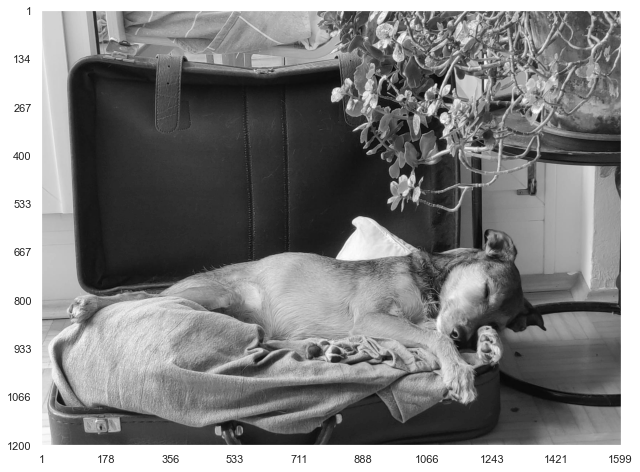

In [4]:
image = plt.imread("charlie_1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
u6.show_image(image)

**1.2. Define the Prewitt operators $P_x$ and $P_y$.**

In [7]:
Px = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
Py = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

**1.3. Apply $P_x$ and $P_y$ to the grayscale image and plot the results.**

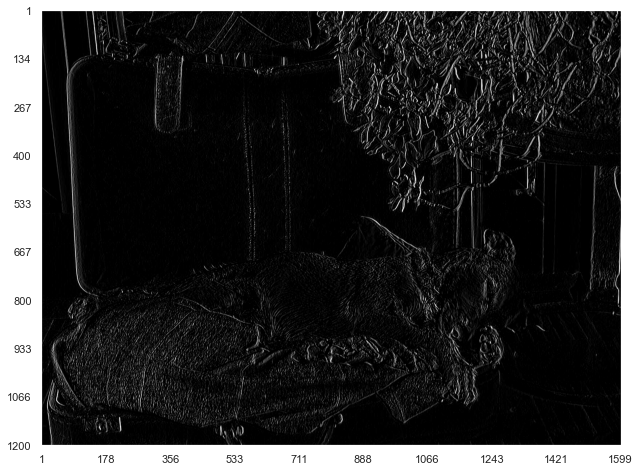

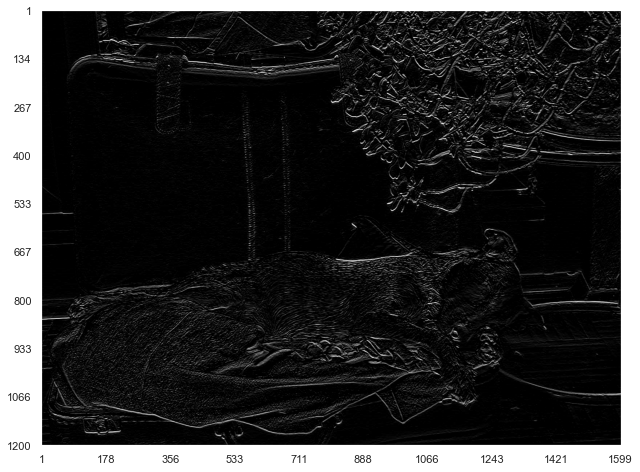

In [10]:
filtered_Px = cv2.filter2D(image, -1, Px)
u6.show_image(filtered_Px)

filtered_Py = cv2.filter2D(image, -1, Py)
u6.show_image(filtered_Py)


**1.4. Which parts of the resulting images above are highlighted? Do you observe any differences between the two Prewitt operators?**

Px extracted (detected) the Vertical Edges
Py extracted (detected) the Horizontal Edges
Diagonal Edges remained relatively unchanged in both images

**1.5. Define the Scharr operators $S_x$ and $S_y$.**

In [17]:
Sx = np.array([[47,0,-47],[162,0,-162],[47,0,-47]])
Sy = np.array([[47,162,47],[0,0,0],[-47,-162,-47]])

**1.6. Apply $S_x$ and $S_y$ to the grayscale image and plot the results.**

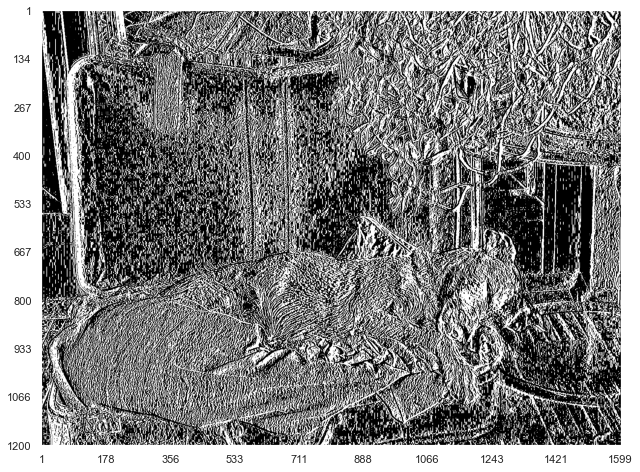

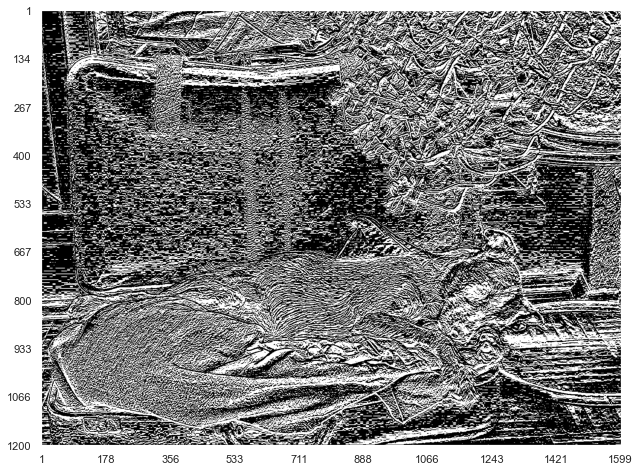

In [19]:
filtered_Sx = cv2.filter2D(image, -1, Sx)
u6.show_image(filtered_Sx)

filtered_Sy = cv2.filter2D(image, -1, Sy)
u6.show_image(filtered_Sy)

**1.7. Which parts of the resulting images above are highlighted? Do you observe any differences between the two Scharr operators?**

Sx extracted (detected) the Vertical Edges
Sy extracted (detected) the Horizontal Edges
Diagonal Edges remained relatively unchanged in both images

**1.8. Do you observe any differences between the Prewitt and the Scharr operators?**

The intensity (Details) of edge detection increased in Sharr Operators than Prewitt:

Matrix Coeffecients:
    Scharr Operators detected finer details of the image (Having Larger Magnitude in each Component)
    Prewitt Operators detected broader details of the image (Having the identity (1) Magnitude in each component)
    
They both have the same Coefficcients Matrix (similar signs for each element)
There is some correlation between the magnitude of the operators' components and the intensity of detail-detection


# Exercise 2

Up until now, custom filters were defined and applied on images, but as you certainly noticed, no neural network was involed so far. The gist of this exercise is to change that and get more insight into how <i>convolutional neural networks</i> operate. For this reason, perform the following tasks:
    
- Define the custom filter as a numpy array:

\begin{equation}F_c = \left[
    \begin{array}{rrrrr}                                
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1
    \end{array}\right]
\end{equation}

- Create three additional copies of the custom filter and apply the same transformations as discussed during the lecture (negate, transpose, negate + transpose).
- Visualize all four filters.

**Note**: Your final array of filters should be of the form $\left[F_c, -F_c, F_c^T, -F_c^T\right]$.

- Create and initialize a neural network of type <code>InitializedNet</code> using the four filters. Define a leaky ReLU activation function (<code>torch.nn.LeakyReLU</code> with `negative_slope=0.2`). Below you see a plot how the leaky ReLU function with our setting looks like.
- Apply the neural network to the grayscale version of Charlie. In contrast to the previous tasks, use <code>get_grayscale_image_tensor</code> to load Charlie (again, <code>charlie_1.jpg</code>).
- Compare the intermediate steps of the network by plotting the result of the convolutional layer and the activation layer.

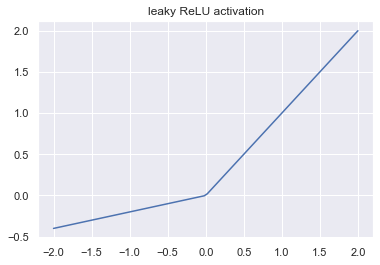

In [44]:
x = torch.tensor(np.linspace(-2, 2, 100))
sns.lineplot(x=x, y=torch.nn.LeakyReLU(negative_slope=0.2)(x))
plt.title("leaky ReLU activation");

**2.1. Define the four filters and plot them.**

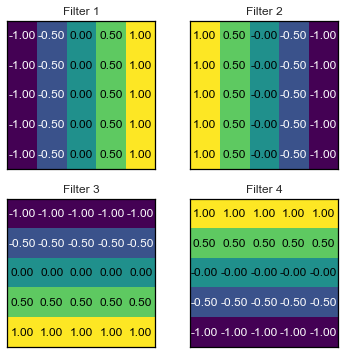

In [45]:
Fc1 = np.array([[-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1]])
Fc2 = -Fc1
Fc3 = Fc1.T
Fc4 = -Fc3

Fc = np.array([Fc1, Fc2, Fc3, Fc4])

u6.visualize_filters(Fc)

**2.2. Which structures do you think these filters might detect?**

Fc1, Fc2 Should detect the Vertical Edges (Fc2 is the inverse of Fc1)
Fc3, Fc4 Should detect the Horizontal Edges (Fc4 is the inverse of Fc3)

**2.3. Create a model using `u6.InitializedNet` with the above filters and the leaky RelU as activation function.**

In [46]:
model = u6.InitializedNet(weights=Fc, activation=torch.nn.LeakyReLU(negative_slope=0.2))

**2.4. Get the grayscale image as tensor and use it as input for the above model to retrieve the layer outputs.**

In [48]:
image = plt.imread("charlie_1.jpg")
image_tensor = u6.get_grayscale_image_tensor(image)

conv_layer, activated_layer,  _  = model(image_tensor)

**2.5. Plot the output of the convolutional layer and the output of the activation layer.**

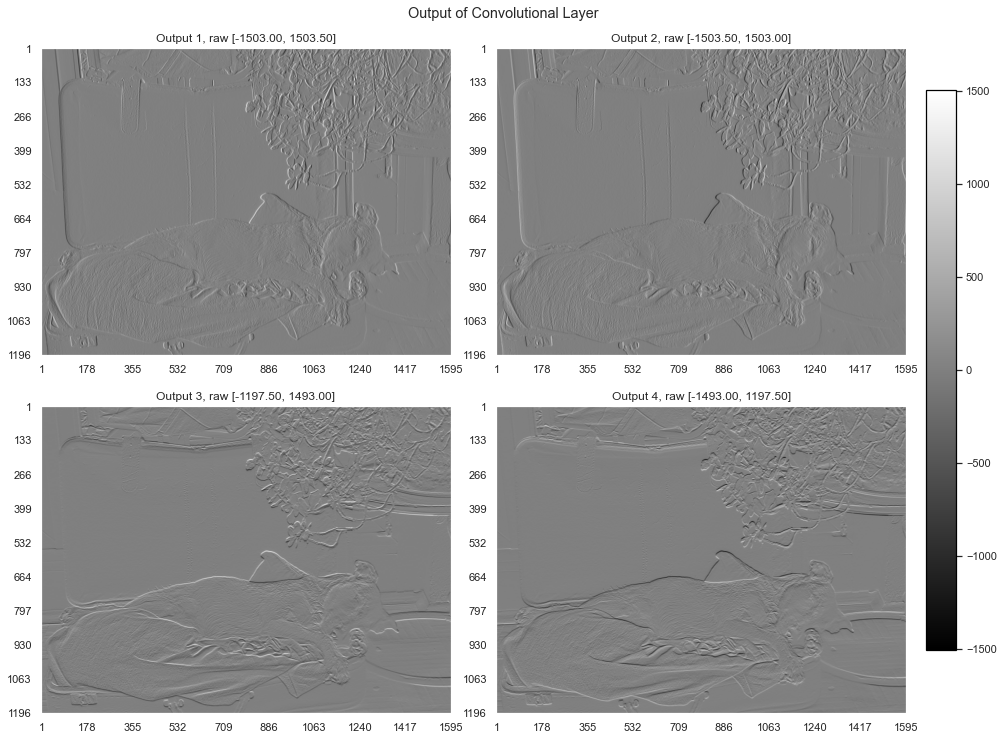

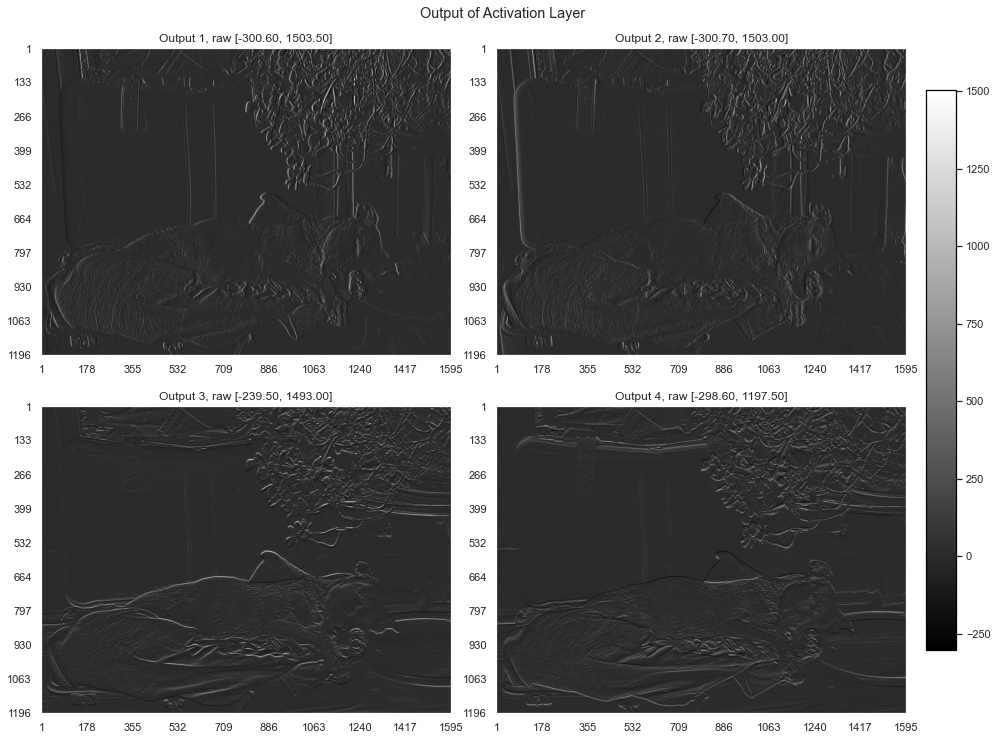

In [49]:
u6.visualize_cnn_layer(conv_layer, title="Output of Convolutional Layer")
u6.visualize_cnn_layer(activated_layer, title="Output of Activation Layer")

**2.6. Which parts of the image are highlighted? Do you observe any differences between the filters (with respect to each other) as well as between the two layers?**

The Horizontal and Vertical Edges are Mainly Highlighted

Fc1 + Fc2 detects Horizontal Edges
    Edges in Fc1 is represented in lighter shade
    Edges in Fc2 is represented in Darker Shade
Fc3 + Fc4 detects Horizontal Edges
    Edges in Fc3 is represented in lighter shade
    Edges in Fc4 is represented in Darker Shade
    
The Output of the Convolution Layer is Much larger in size [roughly the same size of the original image] than the Output of the Activation Layer
Activation Layer Size = 1/4 Convolution Layer Size

# Exercise 3

In this exercise, we want to compare the output of a max pooling layer with the output of a strided convolution. Perform the following steps: 

- Create and initialize four neural networks of type <code>InitializedNet</code> using the four filters from exercise 2. Define a ReLU activation function. Additionally, configure the following hyperparameters:
    -  Model 1: <i>max pooling</i> (parameter `max_pool_size`) with height/width = $3$, don't define a stride value. 
    -  Model 2: <i>stride</i> (parameter `filter_stride`) = $3$, don't define a max pooling size.
    -  Model 3: <i>max pooling</i> with height/width = $7$, don't define a stride value.
    -  Model 4: <i>stride</i> = $7$, don't define a max pooling size.
- Apply the neural networks to the grayscale version of Charlie. Use <code>get_grayscale_image_tensor</code> to load Charlie (again, <code>charlie_1.jpg</code>).
- Compare the effect of max pooling and striding by plotting the result of the max pooling layer of model 1 and 3, and the activation layer of model 2 and 4.

**3.1. Create the four models using `u6.InitializedNet`.**

In [53]:
Fc1 = np.array([[-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1]])
Fc2 = -Fc1
Fc3 = Fc1.T
Fc4 = -Fc3

Fc = np.array([Fc1, Fc2, Fc3, Fc4])

model_1 = u6.InitializedNet(weights=Fc, activation=torch.nn.ReLU(), max_pool_size=(3, 3))
model_2 = u6.InitializedNet(weights=Fc, activation=torch.nn.ReLU(), filter_stride=3)
model_3 = u6.InitializedNet(weights=Fc, activation=torch.nn.ReLU(), max_pool_size=(7, 7))
model_4 = u6.InitializedNet(weights=Fc, activation=torch.nn.ReLU(), filter_stride=7)

**3.2. Get the grayscale image as tensor and use it as input for the above models to retrieve the layer outputs.**

In [54]:
image = plt.imread("charlie_1.jpg")
image_tensor = u6.get_grayscale_image_tensor(image)

conv_layer1, activated_layer1, pooling_layer1 = model_1(image_tensor)
conv_layer2, activated_layer2, _ = model_2(image_tensor)
conv_layer3, activated_layer3, pooling_layer3 = model_3(image_tensor)
conv_layer4, activated_layer4, _ = model_4(image_tensor)

**3.3. Kernel size 3 comparison: Plot the output of the max pooling layer of model 1 and the output of the activation layer of model 2.**

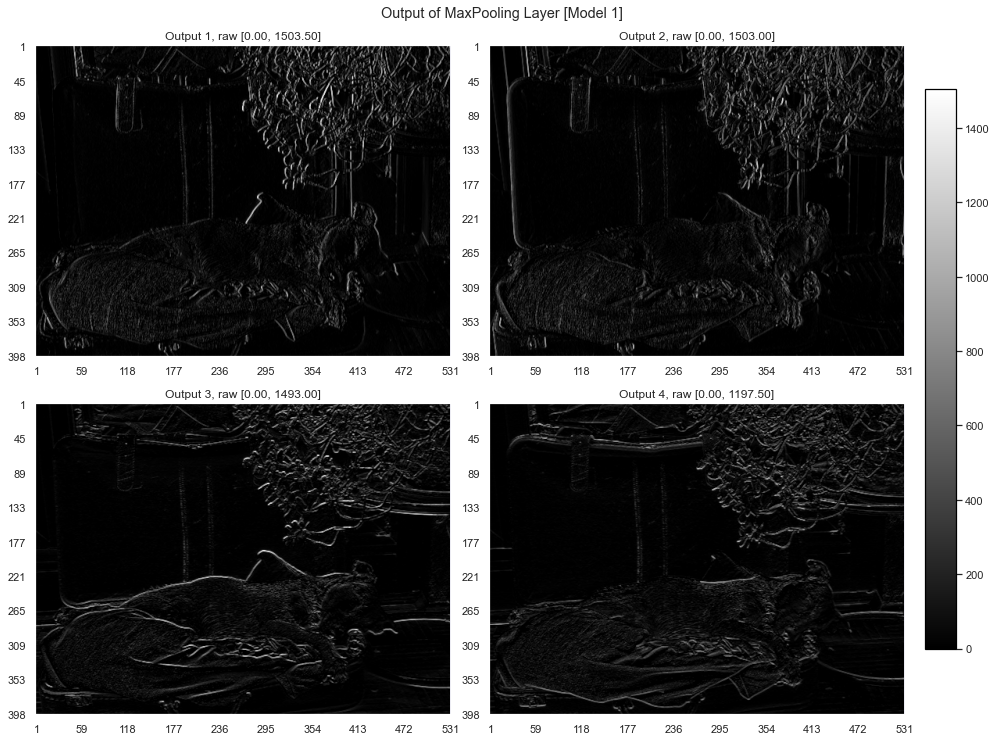

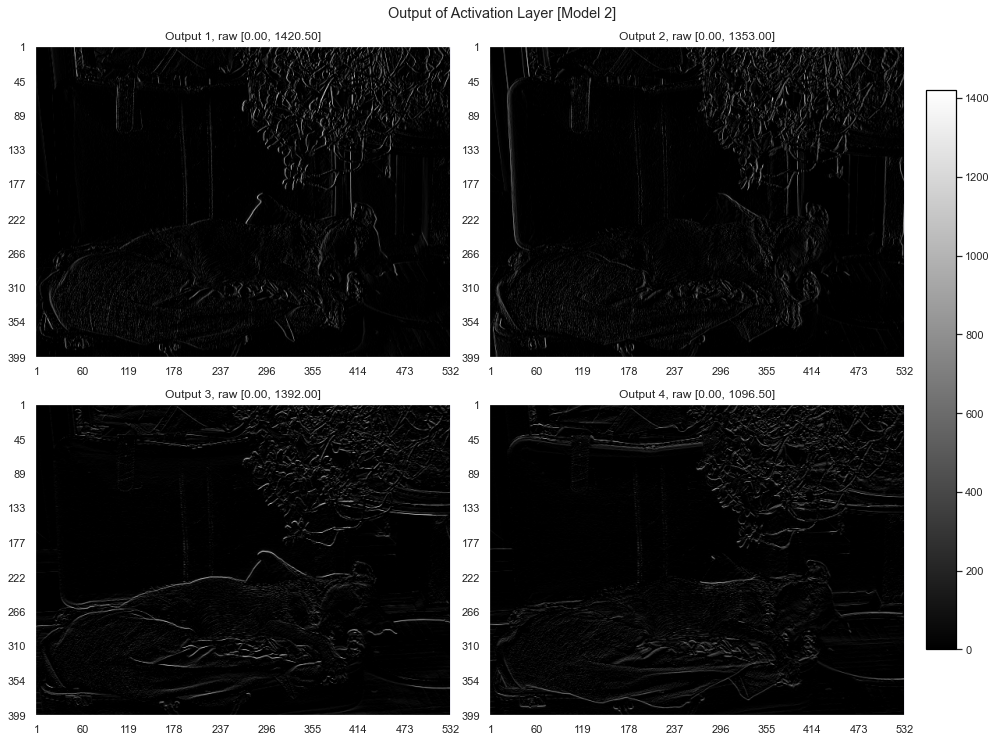

In [55]:
u6.visualize_cnn_layer(pooling_layer1, title="Output of MaxPooling Layer [Model 1]")

u6.visualize_cnn_layer(activated_layer2, title="Output of Activation Layer [Model 2]")

**3.4. Kernel size 7 comparison: Plot the output of the max pooling layer of model 3 and the output of the activation layer of model 4.**

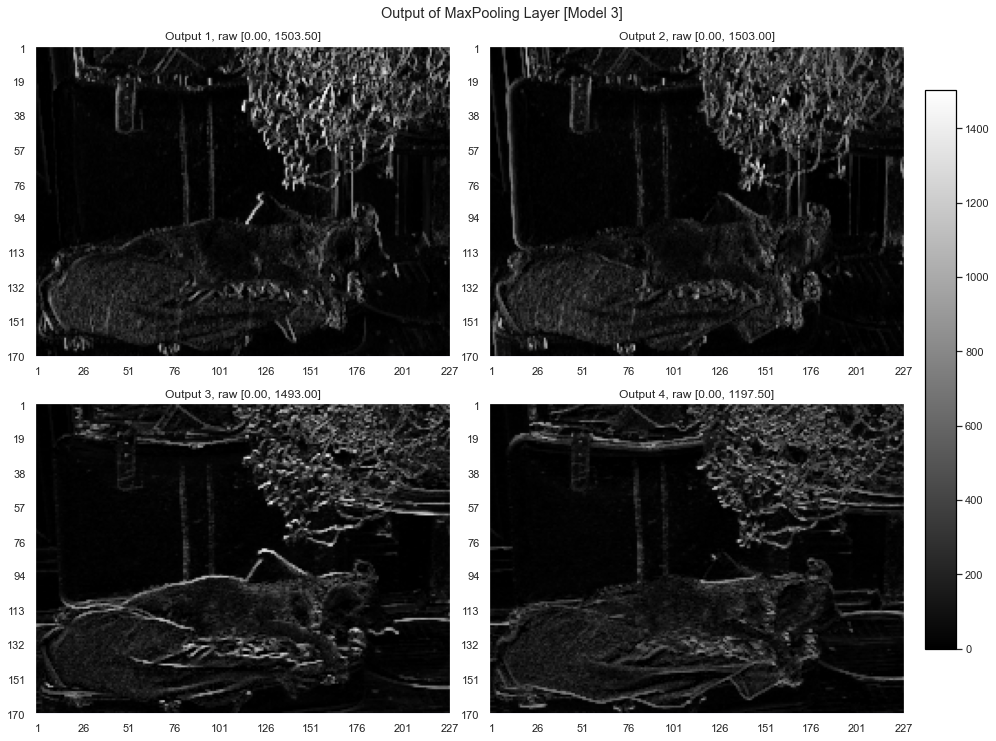

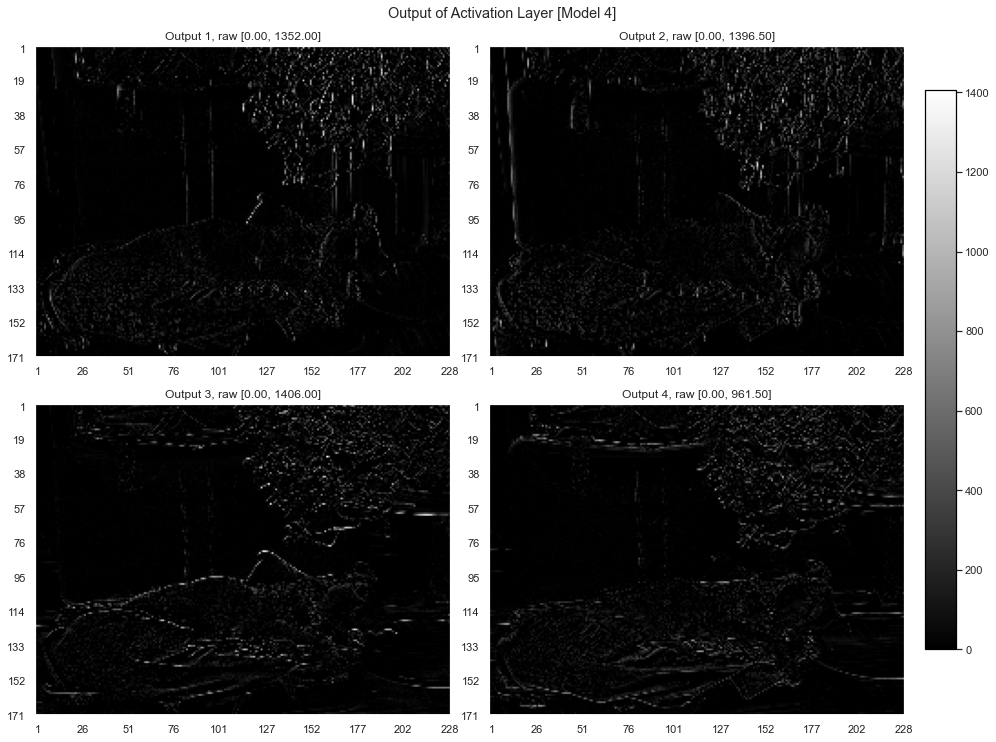

In [56]:
u6.visualize_cnn_layer(pooling_layer3, title="Output of MaxPooling Layer [Model 3]")

u6.visualize_cnn_layer(activated_layer4, title="Output of Activation Layer [Model 4]")

**3.5. Which parts of the image are highlighted? Do you observe any differences between striding and max pooling? Do you observe any differences between the two pooling sizes and the two stride values?**


Edges are mainly highlighted

Activation Layers when using Striding Only tends to have smaller Output Size than when using Maxpooling
The Edges are much more highlighted when using max pooling [better edge detection] than striding only

As The Maxpooling Size increases the number of Edges increases
    Thus Resulting in a Finer Detection
    Changing the value does NOT affect the output layer size

As Striding Size increases The Number of Edges detected decreases
    Because it is skipping more pixels
    Thus Resulting in a "worse" edge detection
    As striding size increases the output layer size decreases (Slightly)
    

# Exercise 4

As you are now an expert in defining and applying custom kernels, we will now move on to learning kernels to create more expressive systems. 

Following the instruction given in the lecture notebook, perform the tasks below, but this time, using the <b>CIFAR10</b> dataset (more information about the dataset can be found here: https://www.cs.toronto.edu/~kriz/cifar.html).

To load the CIFAR10 dataset and take a look at a preview of $10$ samples, run the cell below. The CIFAR10 dataset contains RGB images with a resolution of $32 \times 32$ pixels from $10$ different classes. 

**Note**: The first time you run this, it will download the dataset. You may see a <code>UserWarning: The given NumPy array is not writeable</code>. This can be safely ignored. The download itself might take a couple of minutes

- Create and train a model according to the MNIST example provided in the notebook from the lecture. Keep the structure (ordering and number of layers) and hyperparameters if not stated otherwise. Change the model in a way that:
    - it can process the RGB images from the CIFAR10 dataset as input
    - its convolutional layer applies kernels with size $5$ and outputs $16$ feature maps
    - max pooling applies kernels with size $2$
    - the number of inputs of the linear layer is adapted correctly after flattening the feature maps
    - its first fully connected layer consists of $128$ neurons
- Reload the dataset with a batch size of $20$ and considering $10\%$ of the samples as validation set. Then, train the model with the following hyperparameters: iterations = $5$; momentum = $0.7$; and learning rate = $0.01$. Use the function <code>run_gradient_descent()</code> from <code>u6_utils.py</code>.

**Note**: For reproducibility, set a fixed seed (seed=23). It will need to be set both before defining the model and before the optimization (which includes grabbing samples from the dataset). Otherwise, changes in the model would change the train/validation split samples, since both draw random numbers.

- Plot the training and validation losses and print the accuracy on the test set.
- Visualize the filters from the convolutional layer. 

Files already downloaded and verified
Files already downloaded and verified


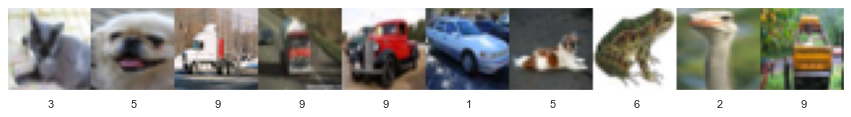

In [91]:
# load the dataset with custom batch size
train_loader, valid_loader, test_loader = u6.get_dataset(
    variant="CIFAR10",
    root="resources",
    batch_size=10,
    valid_size=0.1
)

# load the first batch of data (set seed for reproducibility)
u6.set_seed(23)
images, labels = next(iter(train_loader))
# transform the image shapes and normalize their values ([0, 1]) for visualization purposes
images = np.concatenate([img.squeeze() for img in images], axis=2).transpose(1, 2, 0)
images = (images - images.min()) / (images.max() - images.min())

# display the first batch of data
with plt.style.context({"axes.grid": False, "xtick.bottom": False}):
    plt.figure(figsize=(15, 2))
    plt.imshow(images)
    plt.xticks(16 + np.arange(len(labels)) * 32, labels.numpy())
    plt.yticks([])

**4.1. Reload the dataset with $10\%$ validation data.**

In [108]:
# load the dataset with custom batch size
train_loader, valid_loader, test_loader = u6.get_dataset(
    variant="CIFAR10",
    root="resources",
    batch_size=10,
    valid_size=0.1
)

# load the first batch of data (set seed for reproducibility)
u6.set_seed(23)
images, labels = next(iter(train_loader))
# transform the image shapes and normalize their values ([0, 1]) for visualization purposes
images = np.concatenate([img.squeeze() for img in images], axis=2).transpose(1, 2, 0)
images = (images - images.min()) / (images.max() - images.min())

Files already downloaded and verified
Files already downloaded and verified


**4.2. Define the model (set seed before). Define the loss function. Run the optimization (set seed before).**

In [194]:
u6.set_seed(seed=23)
model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5),  # conv layer: (3, 32, 32) to (16, 30, 30) : left+right (top+bottom)
    torch.nn.ReLU(),                                                 # nonlinearity
    torch.nn.MaxPool2d(kernel_size=2),                               # max pooling layer: (16, 30, 30) to (16, 14, 14) : (/ kernel size - left+right (top+bottom))
    torch.nn.Flatten(),                                              # flatten activation maps: (16, 14, 14) to (16 * 14 * 14)
    torch.nn.Linear(16 * 14 * 14, 128),                              # first fully connected layer (128)
    torch.nn.ReLU(),                                                 # nonlinearity
    torch.nn.Linear(128, 10)                                         # output layer
)

loss = torch.nn.functional.cross_entropy

u6.set_seed(seed=23)
losses = u6.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=train_loader,
    valid_set=valid_loader,
    iterations=5,
    learning_rate=0.01,
    momentum=0.7,
    use_cuda_if_available=True
)

  0%|          | 0/45000 [00:00<?, ?it/s]

Epoch 1 finished with training loss: 1.6010222426255545
Epoch 2 finished with training loss: 1.3012363671395513
Epoch 3 finished with training loss: 1.139887116925584
Epoch 4 finished with training loss: 1.0113271762712135
Epoch 5 finished with training loss: 0.8893708395395014


**4.3. Plot the training and validation losses and print the accuracy on the test set.**

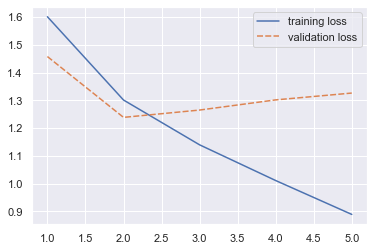

Test set:
{'loss': 1.6207703337073327, 'accuracy': 0.3837000068128109}


In [196]:
sns.lineplot(data=losses)
plt.show()

print("Test set:")
print(u6.evaluate_model(model, test_loader, loss=loss, accuracy=u6.multiclass_accuracy))

**4.4. Plot the filters from the convolutional layer (layer 0).**

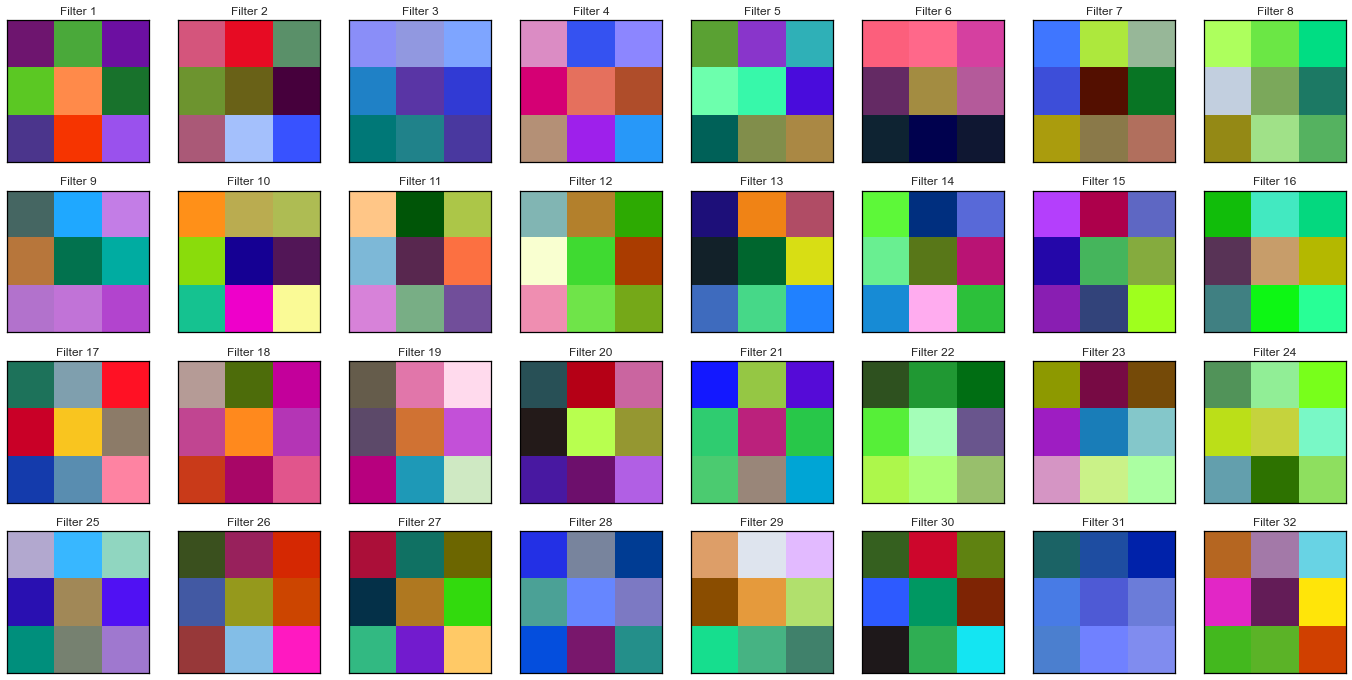

In [197]:
u6.visualize_cnn_filters(model[0], ncols=8)

**4.5. What kind of different structures (or textures) in an image might your CNN detect with these filters?**

Edges(Horizontal, Vertical, Diagonal), Textures / Color Intensity(Warm, Cold, etc..)

# Exercise 5

- Load the CIFAR10 dataset considering $10\%$ of the samples as validation set.
- Create a model similar to the model from exercise 4. Your model should contain at least three convolutional layers (don't forget the nonlinearities), the remaining architecture design is up to you.
- Train the model by using the function <code>run_gradient_descent()</code> from <code>u6_utils.py</code> and choose some appropriate hyperparameters.

**Note**: For reproducibility, set a fixed seed (seed=23). It will need to be set both before defining the model and before the optimization (which includes grabbing samples from the dataset). Otherwise, changes in the model would change the train/validation split samples, since both draw random numbers.

- Can you optimize the model in order to achieve an accuracy on the test set > $70\%$? Plot the training and validation losses to show that your model does not overfit to the training data and print out the accuracy on test to show that it is better than $70\%$.

**Note**: For optimization, you can vary several hyperparameters, e.g.: batch size, iterations, learning rate, momentum, number of layers, number of kernels/neurons, and type of nonlinearity. Also different types of layers are allowed, e.g., [<code>torch.nn.Dropout()</code>](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html). You may also try randomly flipping training images to perform data augmentation (provided by <code>u6.get_dataset()</code>). Do not vary the validation set size, as that would change the training set size.

**5.1. Reload the dataset with $10\%$ validation data (choice of other parameters is up to you).**

In [3]:
# load the dataset with custom batch size
train_loader, valid_loader, test_loader = u6.get_dataset(
    variant="CIFAR10",
    root="resources",
    batch_size=10,
    valid_size=0.1
)

# load the first batch of data (set seed for reproducibility)
u6.set_seed(23)
images, labels = next(iter(train_loader))
# transform the image shapes and normalize their values ([0, 1]) for visualization purposes
images = np.concatenate([img.squeeze() for img in images], axis=2).transpose(1, 2, 0)
images = (images - images.min()) / (images.max() - images.min())
labels

Files already downloaded and verified
Files already downloaded and verified


tensor([3, 5, 9, 9, 9, 1, 5, 6, 2, 9])

**5.2. Define the model (set seed before). Define the loss function. Run the optimization (set seed before).**

In [201]:
u6.set_seed(seed=23)
model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
    torch.nn.ReLU(),
    
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),
    
    torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=64, out_channels=16, kernel_size=3),
    torch.nn.ReLU(),
    
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Flatten(),
    
    torch.nn.Linear(16*25, 16),                                            # (400) -> 16
    torch.nn.ReLU(),
    torch.nn.Linear(16, 16)                                                # 16 -> 16 [Stupid!]
)

loss = torch.nn.functional.cross_entropy

u6.set_seed(seed=23)
losses = u6.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=train_loader,
    valid_set=valid_loader,
    iterations=10,
    learning_rate=0.01,
    momentum=0.7,
    use_cuda_if_available=True
)

  0%|          | 0/45000 [00:00<?, ?it/s]

Epoch 1 finished with training loss: 1.826503800339169
Epoch 2 finished with training loss: 1.321925499094857
Epoch 3 finished with training loss: 1.1348289164238505
Epoch 4 finished with training loss: 1.0251565179477136
Epoch 5 finished with training loss: 0.9537662474976646
Epoch 6 finished with training loss: 0.9034845478965177
Epoch 7 finished with training loss: 0.8665519940124617
Epoch 8 finished with training loss: 0.8325365642540985
Epoch 9 finished with training loss: 0.8106896136850119
Epoch 10 finished with training loss: 0.7910104648545384


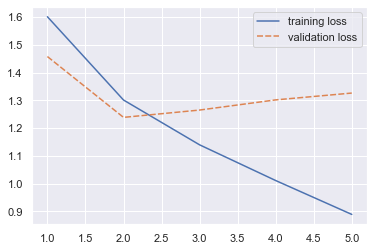

Test set:
{'loss': 1.6207703337073327, 'accuracy': 0.3837000068128109}


In [199]:
sns.lineplot(data=losses)
plt.show()

print("Test set:")
print(u6.evaluate_model(model, test_loader, loss=loss, accuracy=u6.multiclass_accuracy))

In [211]:
# Size Formula:
dil = 1
pad = 0
stride = 1
k_size = 3
H_o1 = ((H_in + 2*pad - dil*(k_size - 1) - 1) / stride) + 1


H_o1 = ((32 + 2*pad - dil*(3 - 1) - 1) / 1) + 1
print('Conv 1:', H_o1)

MP_o1 = ((32 + 2*pad - dil*(2 - 1) - 1) / 2) + 1
print('MaxPool 1:', MP_o1)

H_o2 = ((32 + 2*pad - dil*(3 - 1) - 1) / 1) + 1
print('Conv 2:', H_o2)

MP_o2 = ((64 + 2*pad - dil*(2 - 1) - 1) / 2) + 1
print('MaxPool 2:', MP_o2)

H_o3 = ((64 + 2*pad - dil*(3 - 1) - 1) / 1) + 1
print('Conv 3:', H_o3)

MP_o3 = ((128 + 2*pad - dil*(2 - 1) - 1) / 2) + 1
print('MaxPool 3:', MP_o3)

Conv 1: 30.0
MaxPool 1: 16.0
Conv 2: 30.0
MaxPool 2: 32.0
Conv 3: 62.0
MaxPool 3: 64.0


**5.3. Optimize the model in order to achieve an accuracy on the test set > $70\%$. Plot the training and validation losses and print the accuracy on the test set.**

In [41]:
u6.set_seed(seed=23)
model = torch.nn.Sequential(
    
    torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),

    torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),

    torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),

    torch.nn.Flatten(),
    
    torch.nn.Dropout(0.5),
    
    torch.nn.Linear(512, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 10)
)

print(model)

loss = torch.nn.functional.cross_entropy

u6.set_seed(seed=23)
losses = u6.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=train_loader,
    valid_set=valid_loader,
    iterations=50,
    learning_rate=0.001,
    momentum=0.7,
    use_cuda_if_available=True
)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): ReLU()
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): ReLU()
  (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (9): ReLU()
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=512, out_features=16, bias=True)
  (14): ReLU()
  (15): Linear(in_features=16, out_features=10, bias=True)
)


  0%|          | 0/45000 [00:00<?, ?it/s]

Epoch 1 finished with training loss: 2.223378664440579
Epoch 2 finished with training loss: 1.8598621740606096
Epoch 3 finished with training loss: 1.6352512005964914
Epoch 4 finished with training loss: 1.5041005273130206
Epoch 5 finished with training loss: 1.4000946860843235
Epoch 6 finished with training loss: 1.3310398961438072
Epoch 7 finished with training loss: 1.2625556854605675
Epoch 8 finished with training loss: 1.2193512327803506
Epoch 9 finished with training loss: 1.167616913345125
Epoch 10 finished with training loss: 1.12939343414704
Epoch 11 finished with training loss: 1.0893652586042881
Epoch 12 finished with training loss: 1.0465021964675851
Epoch 13 finished with training loss: 1.0165850114623705
Epoch 14 finished with training loss: 0.9895463849670357
Epoch 15 finished with training loss: 0.9630689889060127
Epoch 16 finished with training loss: 0.9410266725454065
Epoch 17 finished with training loss: 0.9103162180847592
Epoch 18 finished with training loss: 0.8890

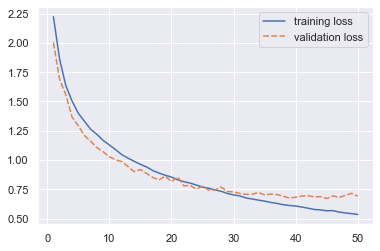

Test set:
{'loss': 0.7269493547752499, 'accuracy': 0.7544999997913837}


In [42]:
sns.lineplot(data=losses)
plt.show()

print("Test set:")
print(u6.evaluate_model(model, test_loader, loss=loss, accuracy=u6.multiclass_accuracy))